prg1, prg2

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
0.8461538461538461
-max-141.9090909090909


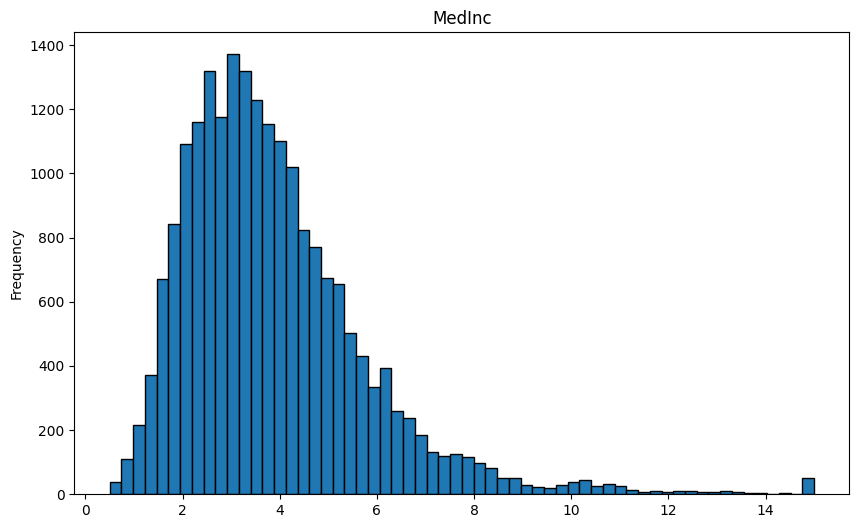

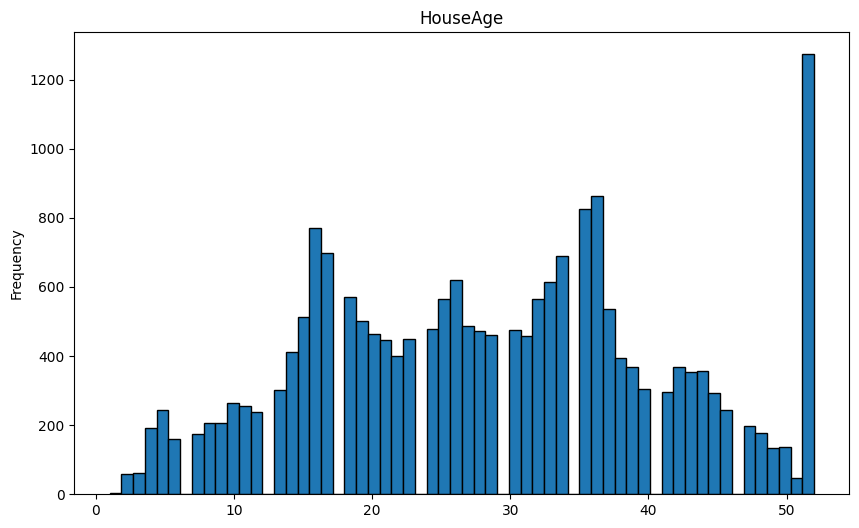

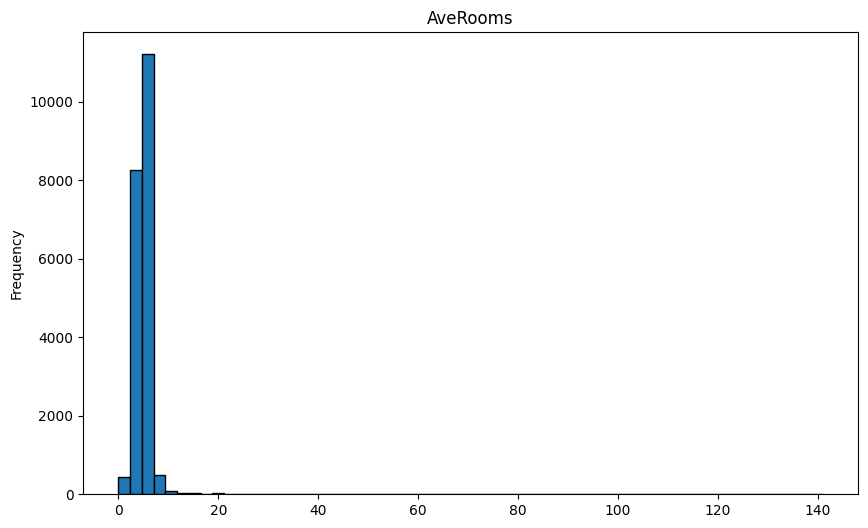

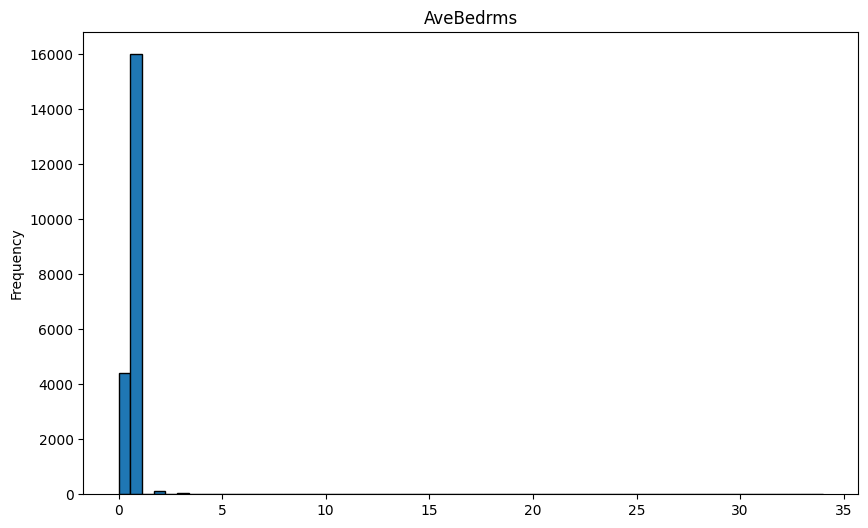

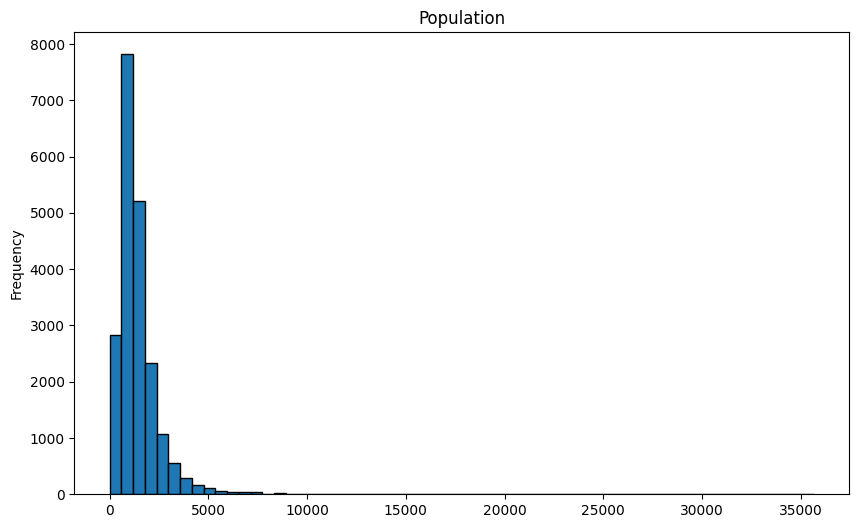

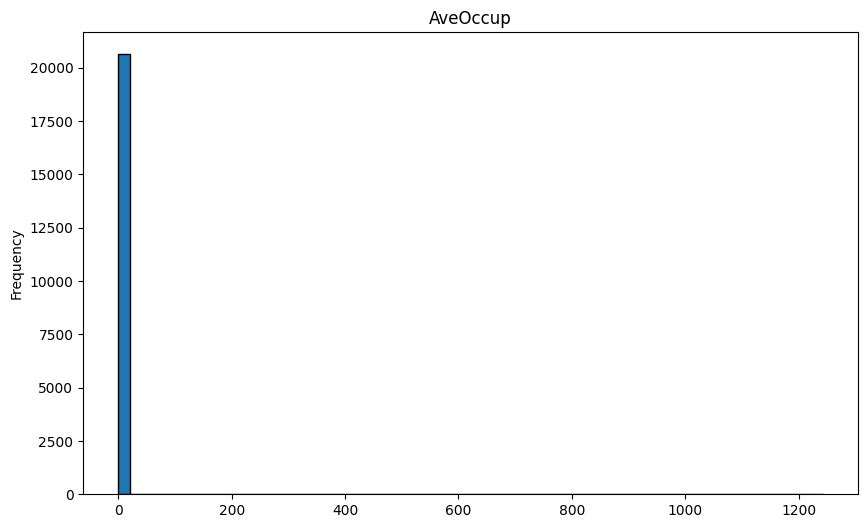

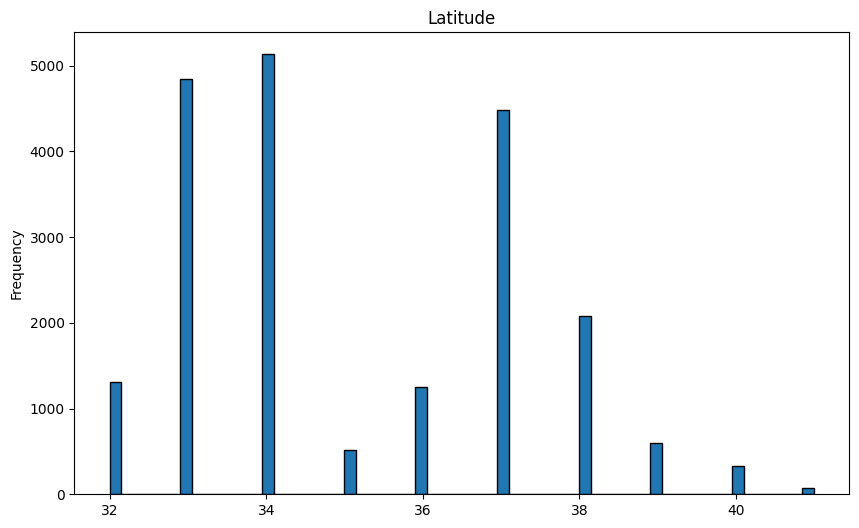

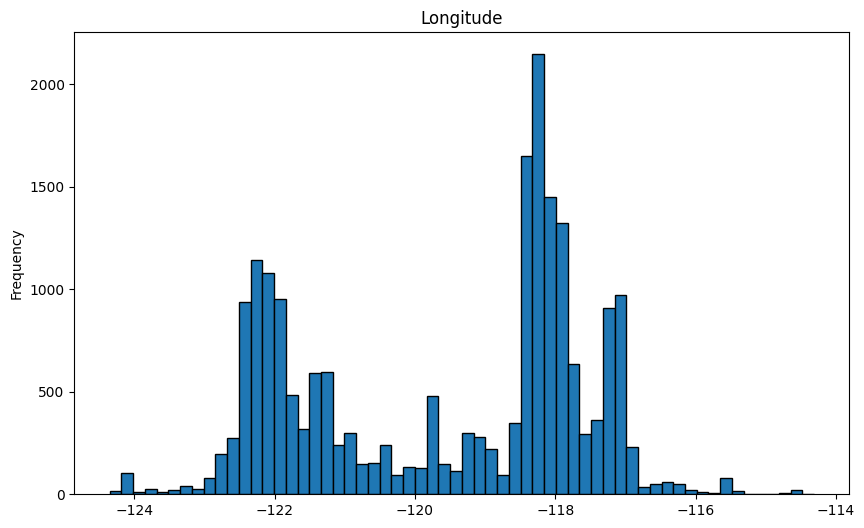

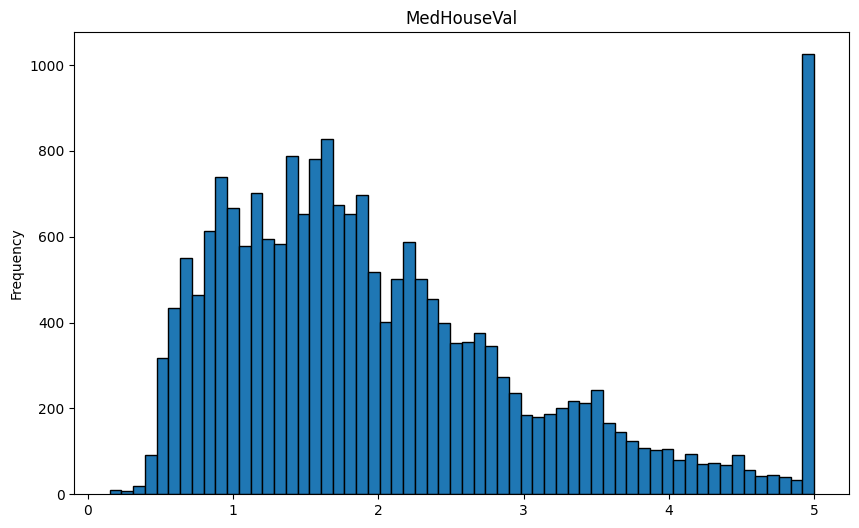

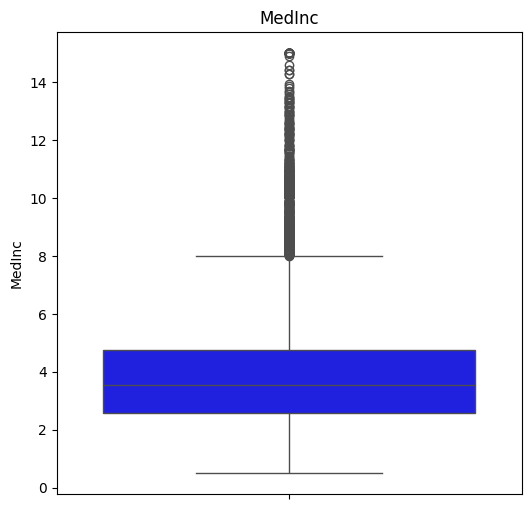

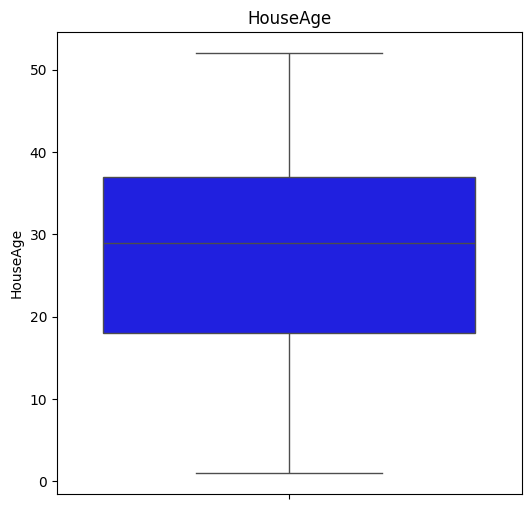

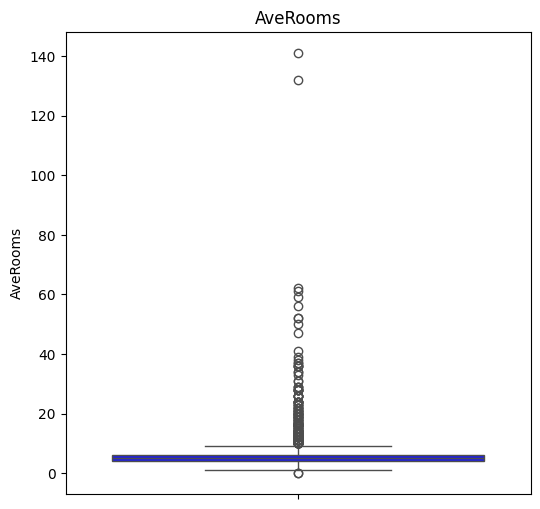

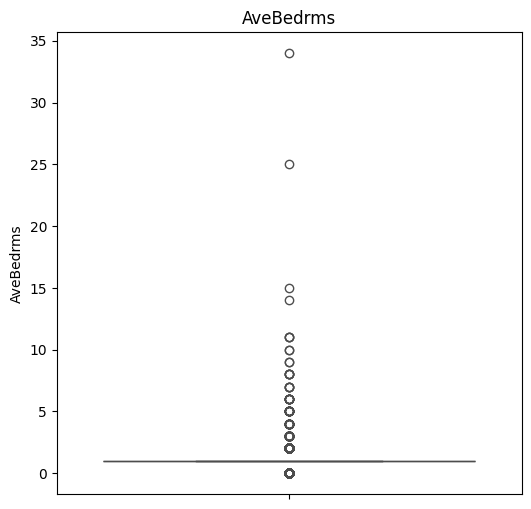

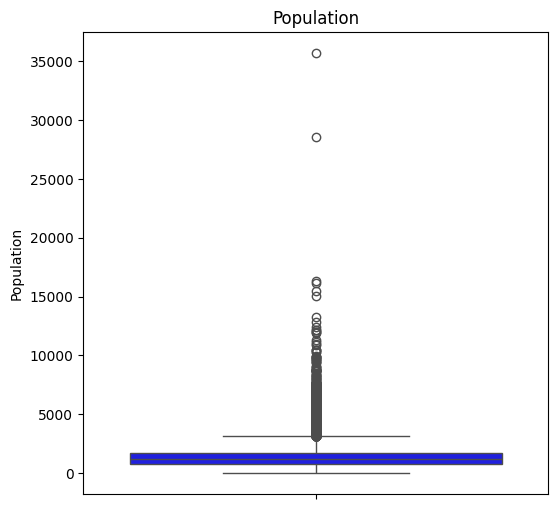

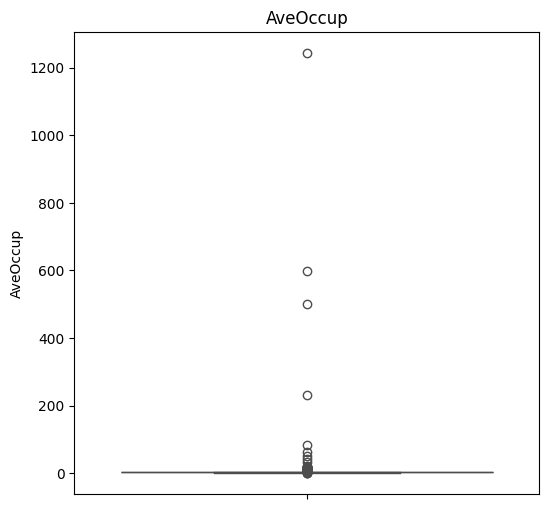

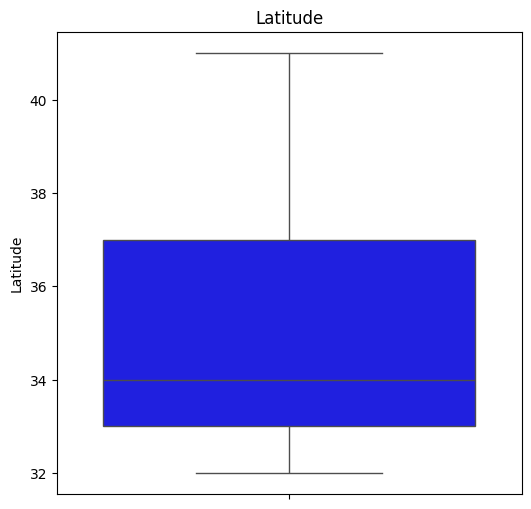

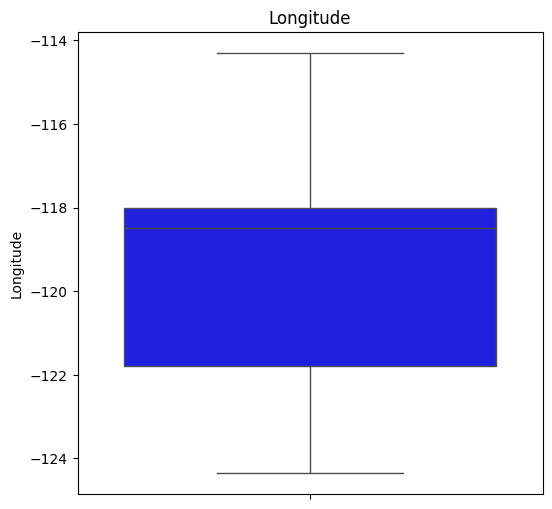

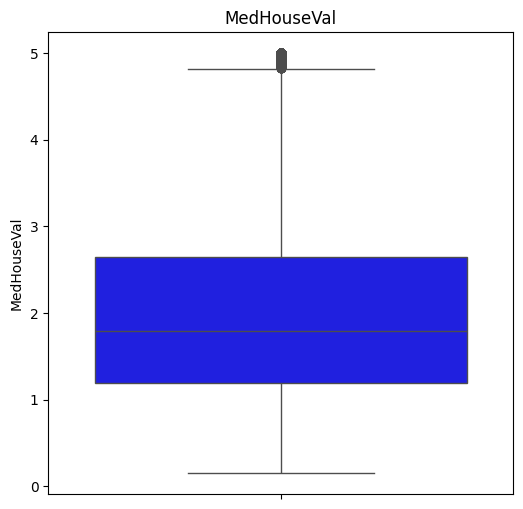

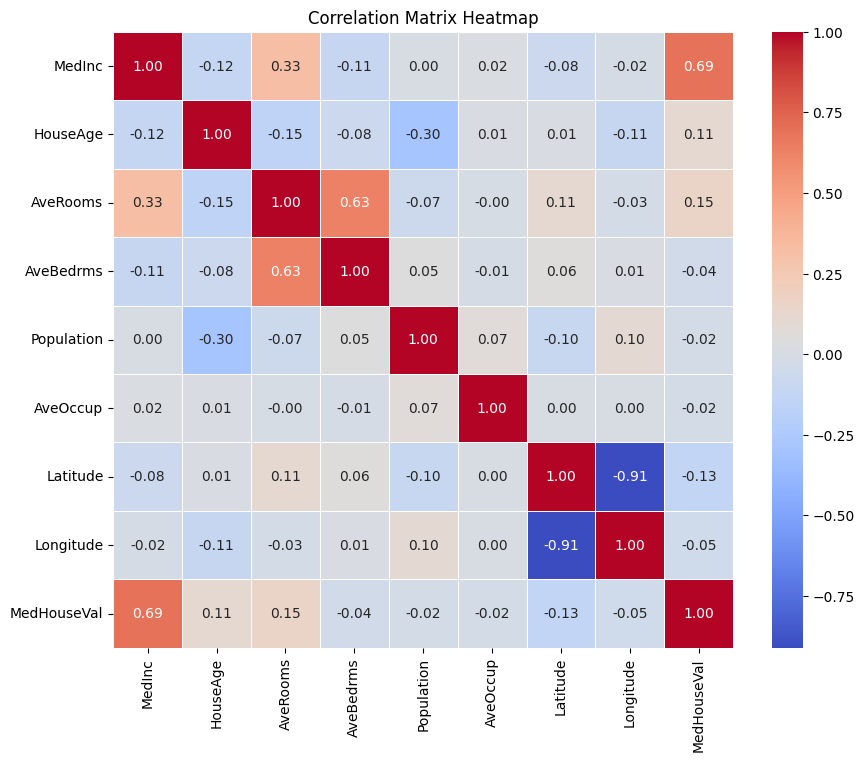

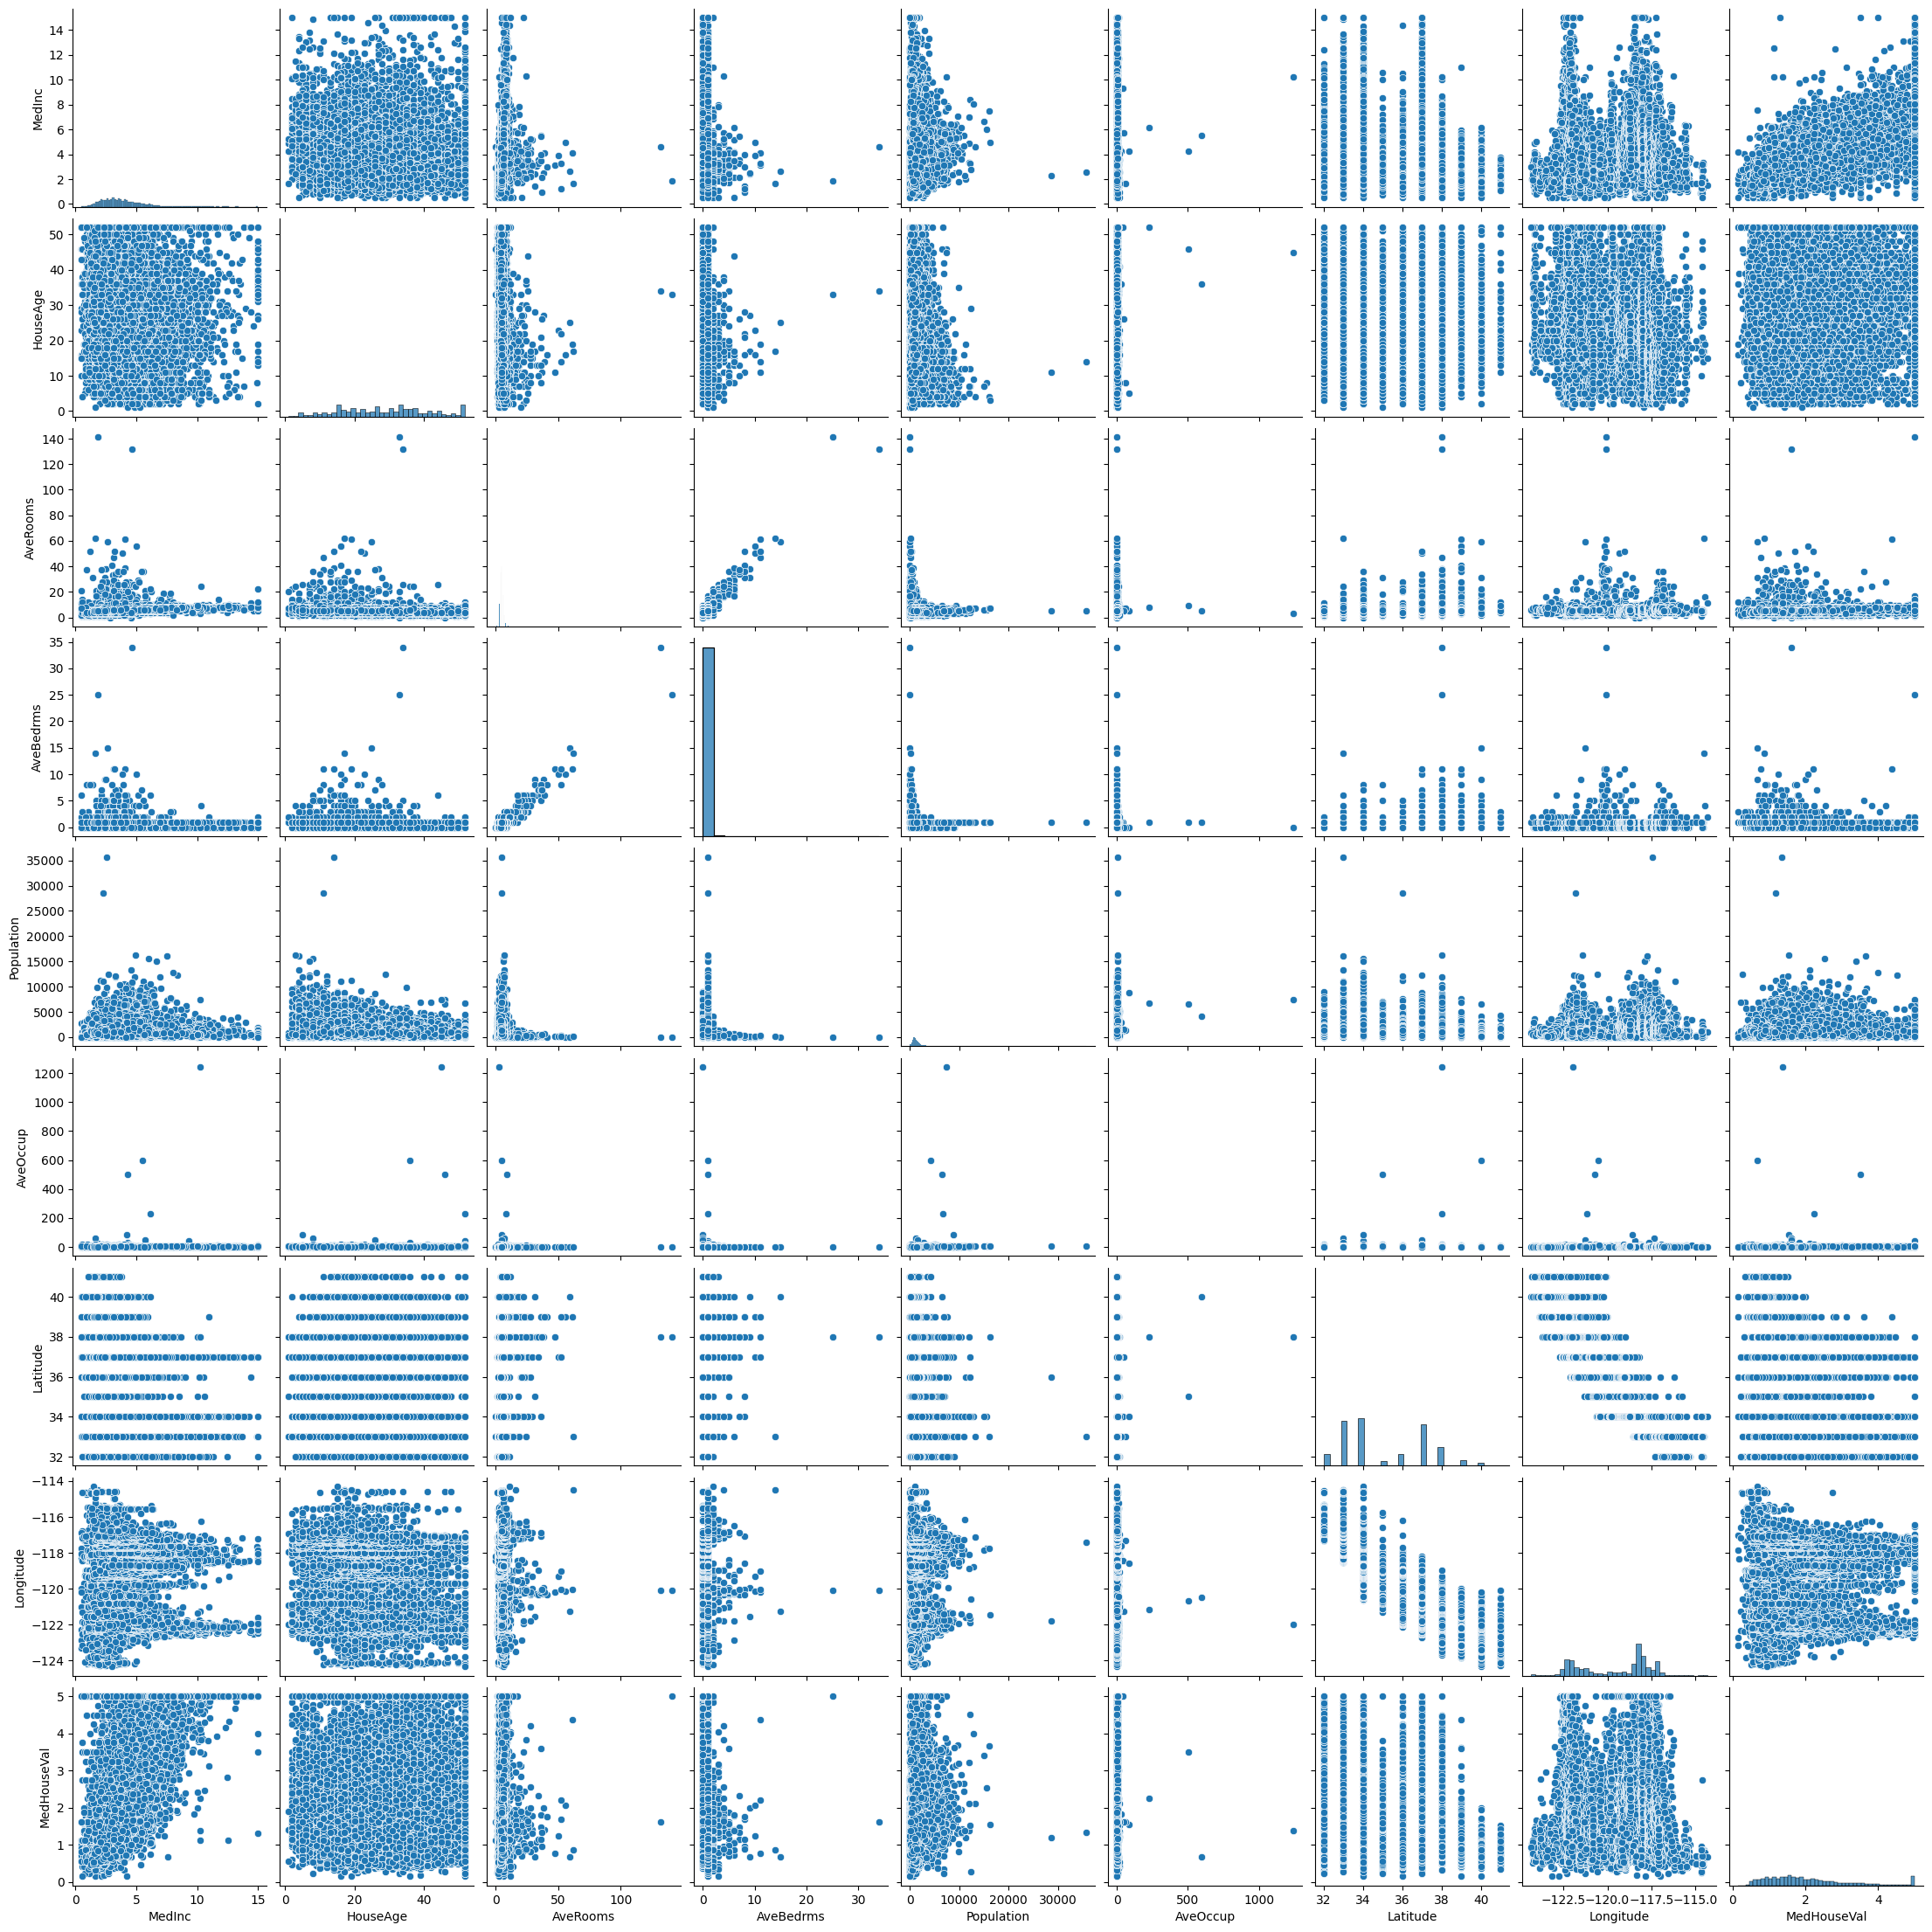

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing(as_frame=True)
df = data.frame

df.head()

df.tail()

df.info()

df.nunique()

df.isnull().sum()

df.duplicated().sum()

min= data.data['AveRooms'].min()
max= data.data['AveRooms'].max()

print(f"{min}")
print(f"-max-{max}")

for i in df.iloc[:, 2:7]:
    df[i] = df[i].astype('int')

df.head()

df.describe().T

numerical = df.select_dtypes(include=[np.number]).columns

for col in numerical:
    plt.figure(figsize=(10, 6))
    df[col].plot(kind='hist', title=col, bins=60, edgecolor='black')
    plt.ylabel('Frequency')
    plt.show()

for col in numerical:
    plt.figure(figsize=(6, 6))
    sns.boxplot(df[col], color='blue')
    plt.title(col)
    plt.ylabel(col)
    plt.show()

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

sns.pairplot(df)
plt.show()

prg3

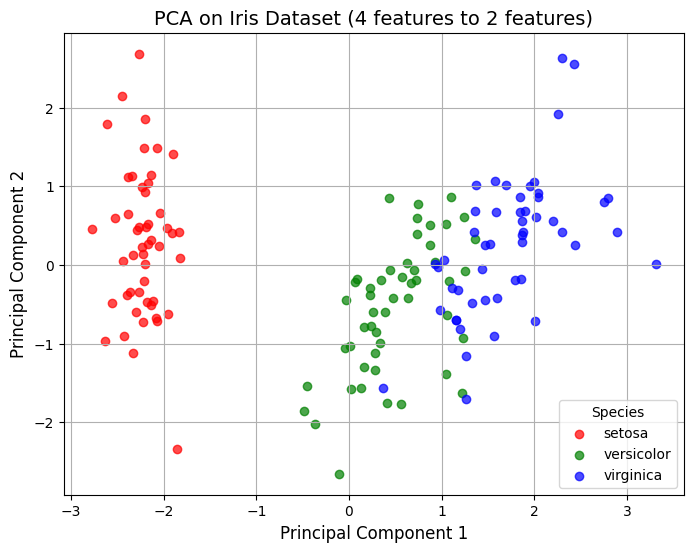

Explained Variance by each Principal Component:
Principal Component 1: 0.7296244541329991
Principal Component 2: 0.22850761786701745
Total Variance Retained: 0.9581320720000166


In [9]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

iris = load_iris()

features = iris.data
target = iris.target

scaler = StandardScaler()
features_scaler = scaler.fit_transform(features)

pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaler)

pca_df = pd.DataFrame(data=features_pca, columns=["Principal Component 1", "Principal Component 2"])
pca_df["Target"] = target

plt.figure(figsize=(8, 6))

colors = ["red", "green", "blue"]

for i, label in enumerate(iris.target_names):
    plt.scatter(
        features_pca[target == i, 0],
        features_pca[target == i, 1],
        c=colors[i],
        label=label,
        alpha=0.7
    )


plt.title("PCA on Iris Dataset (4 features to 2 features)", fontsize=14)
plt.xlabel("Principal Component 1", fontsize=12)
plt.ylabel("Principal Component 2", fontsize=12)
plt.legend(title="Species")
plt.grid()
plt.show()

explained_variance = pca.explained_variance_ratio_

print("Explained Variance by each Principal Component:")
print("Principal Component 1:", explained_variance[0])
print("Principal Component 2:", explained_variance[1])
print("Total Variance Retained:", sum(explained_variance))


prg4

In [6]:
import pandas as pd

data = pd.read_csv('/content/training_data.csv')
print(data)

def find_s_algorithm(data):
    features = data.iloc[:, :-1].values
    labels = data.iloc[:, -1].values

    hypothesis = ['?'] * features.shape[1]

    for i in range(len(labels)):
        if labels[i] == 'Yes':
            for j in range(len(hypothesis)):
                if hypothesis[j] == '?':
                    hypothesis[j] = features[i][j]
                elif hypothesis[j] != features[i][j]:
                    hypothesis[j] = '?'

    return hypothesis

final_hypothesis = find_s_algorithm(data)
print("Most Specific Hypothesis:", final_hypothesis)


    Outlook Temperature Humidity  Windy PlayTennis
0     Sunny         Hot     High  False         No
1     Sunny         Hot     High   True         No
2  Overcast         Hot     High  False        Yes
3      Rain        Cold     High  False        Yes
4      Rain        Cold     High   True         No
5  Overcast         Hot     High   True        Yes
6     Sunny         Hot     High  False         No
Most Specific Hypothesis: ['Overcast', 'Hot', 'High', '?']


prg5

[[0.37454012]
 [0.95071431]
 [0.73199394]
 [0.59865848]
 [0.15601864]]


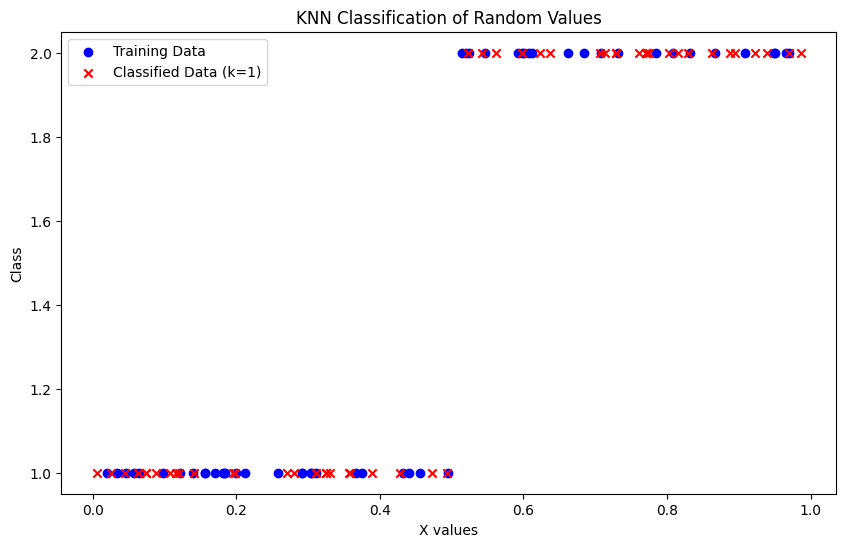

Classification results for k=1: [2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 2 1 2 1 2 2 1 1 2 2 2 2 1 1 1 2 2 1 1 1 1 2
 2 2 1 1 2 2 2 2 1 2 1 1 1]
Classification results for k=2: [2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 2 1 2 1 2 2 1 1 2 2 2 2 1 1 1 2 2 1 1 1 1 2
 2 2 1 1 2 2 2 2 1 2 1 1 1]
Classification results for k=3: [2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 2 1 2 1 2 2 1 1 2 2 2 2 1 1 1 2 2 1 1 1 1 2
 2 2 1 1 2 2 2 2 2 2 1 1 1]
Classification results for k=4: [2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 2 1 2 1 2 2 1 1 2 2 2 2 1 1 1 2 2 1 1 1 1 2
 2 2 1 1 2 2 2 2 2 2 1 1 1]
Classification results for k=5: [2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 2 1 2 1 2 2 1 1 2 2 2 2 1 1 1 2 2 1 1 1 1 2
 2 2 1 1 2 2 2 2 2 2 1 1 1]
Classification results for k=20: [2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 2 1 2 1 2 2 1 1 2 2 2 2 1 1 1 2 2 1 1 1 1 2
 2 2 1 1 2 2 2 2 2 2 1 1 1]
Classification results for k=30: [2 2 2 2 2 2 1 1 1 1 1 1 2 1 1 2 1 2 1 2 2 1 1 2 2 2 2 1 1 1 2 2 1 1 1 1 2
 2 2 1 1 2 2 2 2 1 2 1 1 1]


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(42)
x = np.random.rand(100).reshape(-1, 1)

print(x[:5])

labels = np.array([1 if xi <= 0.5 else 2 for xi in x[:50]])

k_values = [1, 2, 3, 4, 5, 20, 30]

classified_labels = {}

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x[:50], labels)
    classified_labels[k] = knn.predict(x[50:])

plt.figure(figsize=(10, 6))

plt.scatter(x[:50], labels, color='blue', label='Training Data')
plt.scatter(x[50:], classified_labels[1], color='red', marker='x', label='Classified Data (k=1)')
plt.xlabel('X values')
plt.ylabel('Class')
plt.title('KNN Classification of Random Values')
plt.legend()
plt.show()

for k in k_values:
    print(f"Classification results for k={k}: {classified_labels[k]}")

prg6

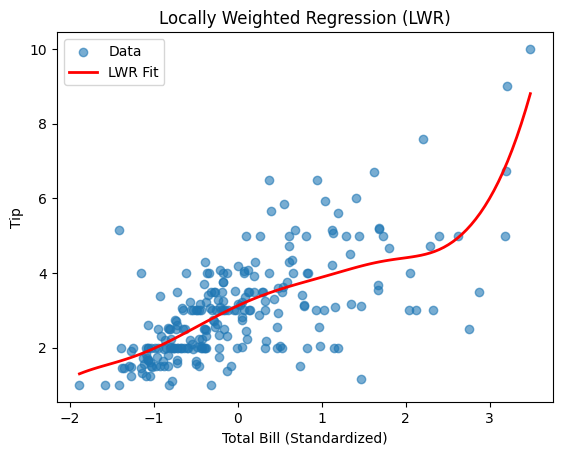

In [10]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

data = sns.load_dataset("tips").drop_duplicates()

X = StandardScaler().fit_transform(data[["total_bill"]])
y = data["tip"].values

def lwr(X_train, y_train, X_test, tau):
    y_pred = []
    X_b = np.c_[np.ones_like(X_train), X_train]
    for x in X_test:
        w = np.exp(-np.sum((X_train - x)**2, axis=1) / (2 * tau**2))
        W = np.diag(w)
        theta = np.linalg.pinv(X_b.T @ W @ X_b) @ (X_b.T @ W @ y_train)
        y_pred.append(np.r_[1, x] @ theta)
    return np.array(y_pred)

X_test = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_pred = lwr(X, y, X_test, tau=0.5)

plt.scatter(X, y, alpha=0.6)
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel("Total Bill (Standardized)")
plt.ylabel("Tip")
plt.title("Locally Weighted Regression (LWR)")
plt.legend(["Data","LWR Fit"])
plt.show()


prg7

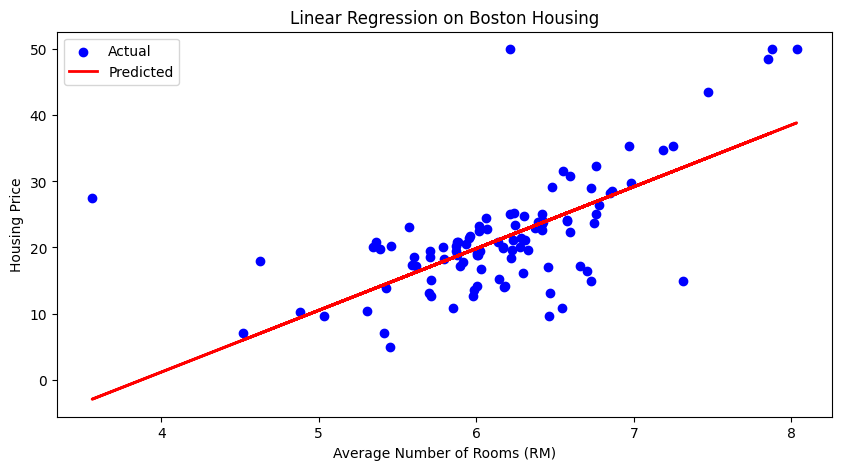

Linear MSE: 46.145


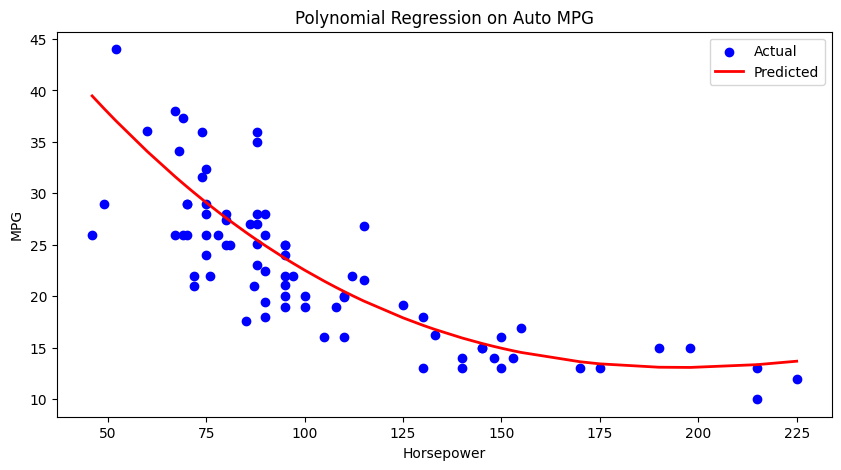

Poly MSE: 18.460


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error

# --- Linear Regression: Boston Housing ---
boston = pd.read_csv('/content/Boston_housing_dataset.csv')
X_boston, y_boston = boston[['RM']].values, boston['MEDV'].values
X_train, X_test, y_train, y_test = train_test_split(X_boston, y_boston, test_size=0.2, random_state=42)

model_lin = LinearRegression().fit(X_train, y_train)
y_pred = model_lin.predict(X_test)

plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, c='blue', label='Actual')
plt.plot(X_test, y_pred, 'r-', lw=2, label='Predicted')
plt.xlabel('Average Number of Rooms (RM)'), plt.ylabel('Housing Price')
plt.title('Linear Regression on Boston Housing'), plt.legend(), plt.show()
print(f"Linear MSE: {mean_squared_error(y_test, y_pred):.3f}")

# --- Polynomial Regression: Auto MPG ---
auto = pd.read_csv('/content/auto_mpg.csv', na_values='?').dropna()
X_auto, y_auto = auto[['horsepower']].astype(float).values, auto['mpg'].values
X_train, X_test, y_train, y_test = train_test_split(X_auto, y_auto, test_size=0.2, random_state=42)

model_poly = make_pipeline(PolynomialFeatures(3), StandardScaler(), LinearRegression()).fit(X_train, y_train)
y_poly_pred = model_poly.predict(X_test)

sorted_X, sorted_y = zip(*sorted(zip(X_test.flatten(), y_poly_pred)))
plt.figure(figsize=(10, 5))
plt.scatter(X_test, y_test, c='blue', label='Actual')
plt.plot(sorted_X, sorted_y, 'r-', lw=2, label='Predicted')
plt.xlabel('Horsepower'), plt.ylabel('MPG')
plt.title('Polynomial Regression on Auto MPG'), plt.legend(), plt.show()
print(f"Poly MSE: {mean_squared_error(y_test, y_poly_pred):.3f}")


prg8

Model Accuracy: 94.74%
Predicted Class for the new sample: Benign


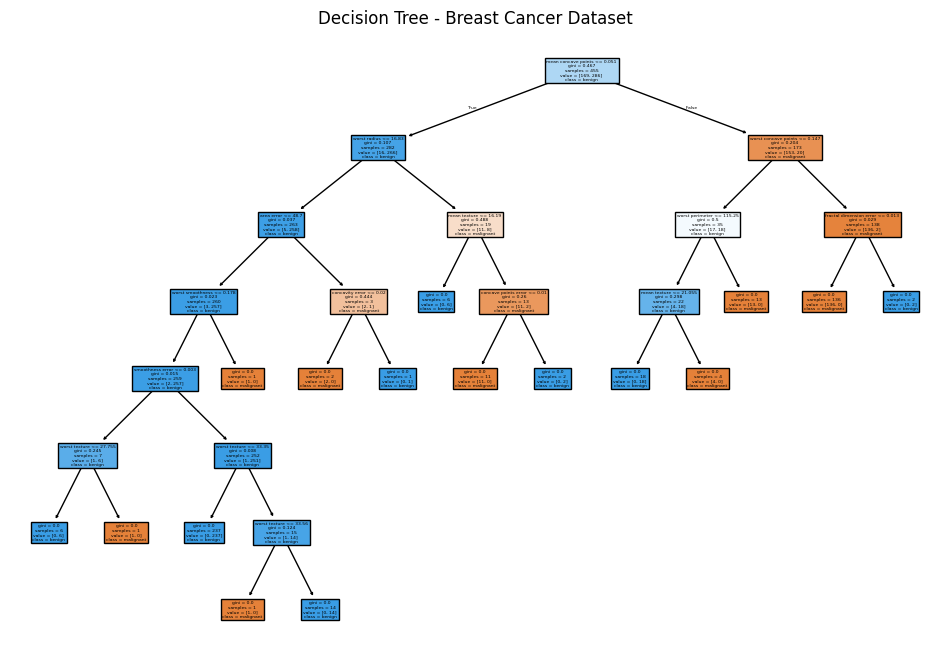

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

new_sample = np.array([X_test[0]])
prediction = model.predict(new_sample)
prediction_class = "Benign" if prediction == 1 else "Malignant"
print(f"Predicted Class for the new sample: {prediction_class}")

plt.figure(figsize=(12,8))
tree.plot_tree(model, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.title("Decision Tree - Breast Cancer Dataset")
plt.show()

prg9

Accuracy: 0.82

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       1.00      0.67      0.80         3
           2       0.43      1.00      0.60         3
           3       1.00      0.33      0.50         3
           4       1.00      0.33      0.50         3
           5       1.00      1.00      1.00         3
           6       1.00      0.67      0.80         3
           7       0.60      1.00      0.75         3
           8       1.00      1.00      1.00         3
           9       1.00      0.33      0.50         3
          10       1.00      0.67      0.80         3
          11       1.00      1.00      1.00         3
          12       1.00      1.00      1.00         3
          13       1.00      0.67      0.80         3
          14       1.00      1.00      1.00         3
          15       0.50      1.00      0.67         3
          16       1.00      0.33      0.5

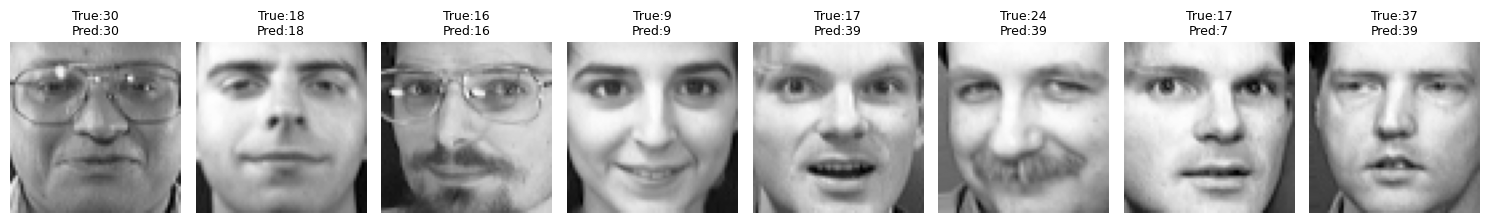

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

faces = fetch_olivetti_faces()
X = faces.data
y = faces.target
images = faces.images

X_train, X_test, y_train, y_test, img_train, img_test = train_test_split(
    X, y, images, test_size=0.3, random_state=42, stratify=y
)

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

def show_pred(imgs, y_true, y_pred, n=8):
    plt.figure(figsize=(15, 4))
    for i in range(n):
        plt.subplot(1, n, i + 1)
        plt.imshow(imgs[i], cmap='gray')
        plt.title(f"True:{y_true[i]}\nPred:{y_pred[i]}", fontsize=9)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_pred(img_test, y_test, y_pred)

prg10

Confusion Matrix:
 [[176  36]
 [ 18 339]]
Accuracy: 0.9050966608084359


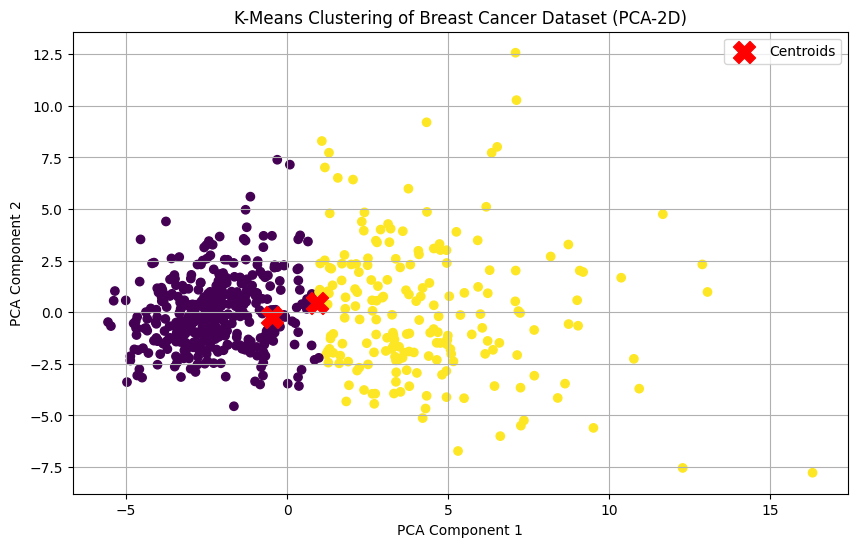

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, accuracy_score

data = load_breast_cancer()
X= data.data
y = data.target
X_scaled = StandardScaler().fit_transform(X)

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

labels = np.where(clusters == 1, 0, 1)

print("Confusion Matrix:\n", confusion_matrix(y, labels))
print("Accuracy:", accuracy_score(y, labels))

X_pca = PCA(n_components=2).fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=250, marker='X', c='red', label='Centroids')
plt.title("K-Means Clustering of Breast Cancer Dataset (PCA-2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()
